# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)
ride_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [5]:
city_data_df.count()

city_data_df.isnull().sum()
city_data_df.dtypes

# Get the unique values of the type of city.

# sum( == "urban")

city_data_df["type"].unique()
print(sum(city_data_df["type"] == "Suburban"))

print(sum(city_data_df["type"] == "Rural"))

36
18


In [6]:
ride_data_df.count()
ride_data_df.isnull().sum()
ride_data_df.dtypes

len(ride_data_df["city"].unique())


120

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"], sort=True)

# Display the DataFrame
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2019-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2019-01-21 04:12:54,9.26,5528427024492,12,Urban


In [8]:
suburban_count = sum(city_data_df["type"] == "Suburban")
rural_count = sum(city_data_df["type"] == "Rural")
urban_count = sum(city_data_df["type"] == "Urban")


In [9]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2019-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2019-01-21 04:12:54,9.26,5528427024492,12,Urban


In [10]:
# Create the Urban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
40,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
41,Barronchester,2019-05-05 04:03:11,30.38,2281522828169,11,Suburban
42,Barronchester,2019-04-25 19:11:43,36.13,2660177707065,11,Suburban
43,Barronchester,2019-03-31 06:05:30,44.24,1252888806772,11,Suburban
44,Barronchester,2019-03-02 23:36:58,36.49,4031573980778,11,Suburban


In [11]:
# Create the Urban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
74,Bradshawfurt,2019-03-06 21:44:53,19.74,6080367372860,7,Rural
75,Bradshawfurt,2019-03-24 18:53:18,57.51,2301998876294,7,Rural
76,Bradshawfurt,2019-03-24 07:34:03,19.89,7867402022145,7,Rural
77,Bradshawfurt,2019-02-18 22:21:26,34.32,8881996813087,7,Rural
78,Bradshawfurt,2019-04-08 13:46:03,55.19,1742954306812,7,Rural


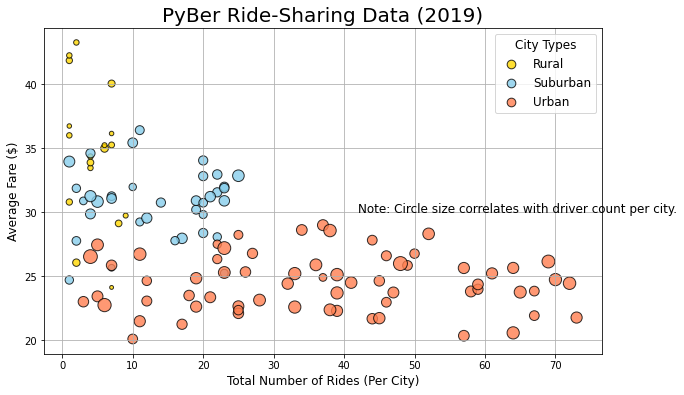

In [12]:
# The average fare for each type of city on the y-axis
# The total number of rides for each type of city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
# Here are the steps to create a bubble chart:

# To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.




# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head(20)


# Get the number of rides for Sub urban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head(20)


# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head(20)



# Get the number of rides for urban cities.
urban_ride_average = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ride_average.head(20)


# Get the number of rides forSub urban cities.
suburban_ride_average = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ride_average.head(20)


# Get the number of rides for Rural cities.
rural_ride_average = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ride_average.head(20)


# Get the number of rides for urban cities.
urban_ride_driver_average = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_ride_driver_average.head(20)


# Get the number of rides forSub urban cities.
suburban_ride_driver_average = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_ride_driver_average.head(20)


# Get the number of rides for Rural cities.
rural_ride_driver_average = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_ride_driver_average.head(20)

plt.subplots(figsize=(10, 6))
plt.scatter(x= rural_ride_driver_average, y =rural_ride_average , s=rural_ride_count *5,
           c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(x= suburban_ride_driver_average, y =suburban_ride_average , s=suburban_ride_count *5,
           c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(x= urban_ride_driver_average, y =urban_ride_average, s= urban_ride_count *5,
            c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")



#  Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 30, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()



# Summary Statistics for Number of Rides by City Type

In [20]:
# Get summary statistics.
urban_ride_count.describe()
urban_ride_count.median()

24.0

In [22]:
# Get summary statistics.
suburban_ride_count.describe()
suburban_ride_count.median()
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [19]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Findings: If we compare the average number of rides between each city type, we'll notice that the average number of rides in the rural cities is about 3.5 and 2.5 times lower than urban and suburban cities, respectively.

In [25]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [31]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

suburban_fares = suburban_cities_df["fare"]

rural_fares = rural_cities_df["fare"]

urban_fares.count()
urban_fares.dtypes

print(urban_fares.describe())

print(suburban_fares.describe())

print(rural_fares.describe())



count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [36]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

print(round(urban_drivers.describe()))
print(round(suburban_drivers.describe()))
print(round(rural_drivers.describe()))

count    1625.0
mean       37.0
std        20.0
min         3.0
25%        22.0
50%        37.0
75%        52.0
max        73.0
Name: driver_count, dtype: float64
count    625.0
mean      14.0
std        8.0
min        1.0
25%        5.0
50%       16.0
75%       21.0
max       25.0
Name: driver_count, dtype: float64
count    125.0
mean       4.0
std        3.0
min        1.0
25%        1.0
50%        4.0
75%        7.0
max        9.0
Name: driver_count, dtype: float64


#Box-and-Whisker Plots for Ride Count Data

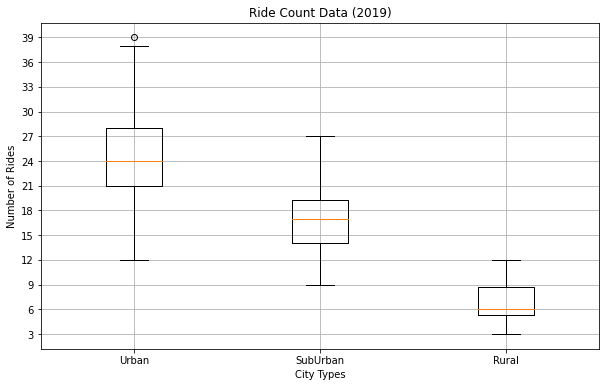

In [68]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","SubUrban","Rural"]

# Add the title, y-axis label and grid.
fig, ax = plt.subplots(figsize=(10, 6))

plt.yticks(np.arange(0, 45, step=3.0))
plt.boxplot(x= [urban_ride_count, suburban_ride_count, rural_ride_count],labels =x_labels)
plt.grid()
plt.title('Ride Count Data (2019)')
plt.ylabel('Number of Rides')
plt.xlabel('City Types')
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

## OUTLIERS

In [64]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


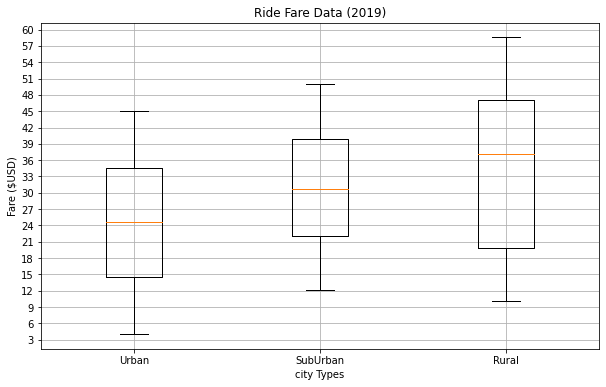

In [67]:

# Add the title, y-axis label and grid.
fig, ax = plt.subplots(figsize=(10, 6))

plt.yticks(np.arange(0, 70, step=3.0))
plt.boxplot(x= [urban_fares, suburban_fares, rural_fares],labels =x_labels)
plt.grid()
plt.title('Ride Fare Data (2019)')
plt.ylabel('Fare ($USD)')
plt.xlabel("City Types")

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

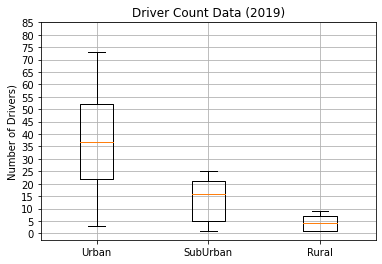

Summary Statistics
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


In [79]:
# Create the box-and-whisker plot for the urban driver count data.

fig, ax = plt.subplots()
x_values = [urban_drivers,suburban_drivers,rural_drivers]


x_labels = ["Urban","SubUrban","Rural"]
ax.boxplot(x_values,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()


print("Summary Statistics")
print(urban_drivers.describe())
print(suburban_drivers.describe())
print(rural_drivers.describe())
